# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range = 90 # ROTATION ANGLE RANGE -40 TO +40
)

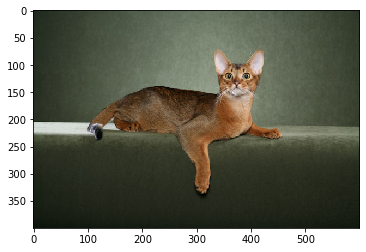

In [15]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

# Task 3: Width and Height Shifts

Found 1 images belonging to 1 classes.


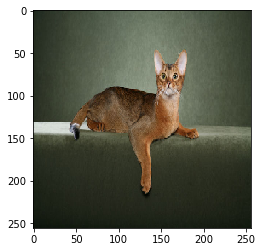

In [20]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


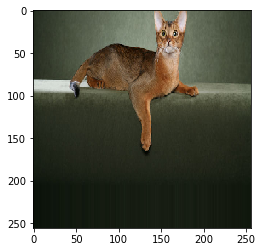

In [25]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range = [-100 , -50 , 0 , 50 , 100],
    height_shift_range = [-50 , 0 , 50]
)
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


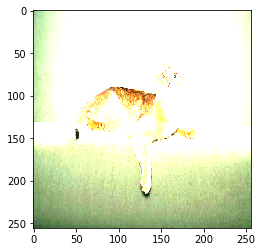

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range = (0.2 , 5.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


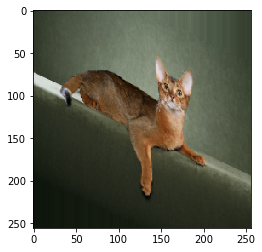

In [32]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range = 40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


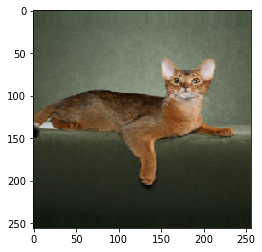

In [37]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range = [0.5 , 1.5]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


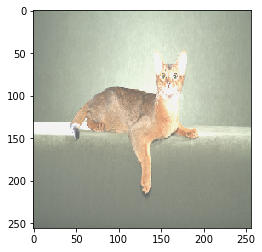

In [41]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


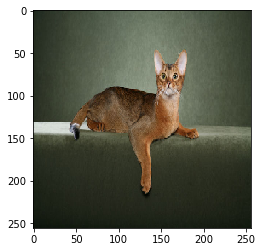

In [44]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [45]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# x_mean = x_train.mean()
# x_std = x_train.std()
# x_train_norm = (x_train - x_mean) / x_std
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
    # Your code here
)

generator.fit(x_train)

In [46]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.21569915 0.7398662 [[5]]
120.70756512369792


### Samplewise

In [49]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 1.0 [[8]]


# Task 10: Rescale and Preprocessing Function

In [50]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [53]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [54]:
print(x.mean(), x.std(), y)

0.010672 0.40131226 [[8]]


# Task 11: Using in Model Training

In [56]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)

In [57]:
# Your code here
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False , input_shape = (32,32,3),
        pooling = 'avg'
    ),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
loss = 'sparse_categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [58]:
_ = model.fit(
    generator.flow(x_train , y_train, batch_size = 32),
    epochs = 1 , steps_per_epoch = 10
)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 11s 1s/step - loss: 3.0822 - accuracy: 0.1688
